In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
pwd

'C:\\Users\\91843'

In [14]:
df= pd.read_csv('salary.csv')

C:\Users\91843\AppData\Local\Temp\ipykernel_12428\3921266379.py:1: DtypeWarning: Columns (16,18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('salary.csv')


In [16]:
# Display basic info
df.info()
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AGENCY                   149481 non-null  int64  
 1   AGENCY NAME              149481 non-null  object 
 2   LAST NAME                149481 non-null  object 
 3   FIRST NAME               149481 non-null  object 
 4   MI                       149481 non-null  object 
 5   CLASS CODE               149481 non-null  object 
 6   CLASS TITLE              149481 non-null  object 
 7   ETHNICITY                149481 non-null  object 
 8   GENDER                   149481 non-null  object 
 9   STATUS                   149481 non-null  object 
 10  EMPLOY DATE              149481 non-null  object 
 11  HRLY RATE                149481 non-null  float64
 12  HRS PER WK               149481 non-null  float64
 13  MONTHLY                  149481 non-null  float64
 14  ANNU

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN


# Exploratory Data Analysis (EDA)

In [19]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])


Missing Values:
 duplicated                 149338
multiple_full_time_jobs    149467
combined_multiple_jobs     149384
summed_annual_salary       149465
hide_from_search           149465
dtype: int64


In [21]:
# Checking for duplicate rows
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)


Number of duplicate rows: 0


In [23]:
# Data types of each column
print("\nColumn Data Types:")
print(df.dtypes)



Column Data Types:
AGENCY                       int64
AGENCY NAME                 object
LAST NAME                   object
FIRST NAME                  object
MI                          object
CLASS CODE                  object
CLASS TITLE                 object
ETHNICITY                   object
GENDER                      object
STATUS                      object
EMPLOY DATE                 object
HRLY RATE                  float64
HRS PER WK                 float64
MONTHLY                    float64
ANNUAL                     float64
STATE NUMBER                 int64
duplicated                  object
multiple_full_time_jobs    float64
combined_multiple_jobs      object
summed_annual_salary       float64
hide_from_search            object
dtype: object


In [25]:
# Unique values in categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nUnique values in {col}: {df[col].nunique()}")
    print(df[col].unique())


Unique values in AGENCY NAME: 113
['COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECTION '
 'OFFICE OF COURT ADMINISTRATION                    '
 'TEXAS DEPARTMENT OF CRIMINAL JUSTICE              '
 'OFFICE OF THE ATTORNEY GENERAL                    '
 'TEXAS DEPARTMENT OF TRANSPORTATION                '
 'TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL         '
 'BOARD OF EXAMINERS OF PSYCHOLOGISTS               '
 'DEPARTMENT OF STATE HEALTH SERVICES               '
 'DEPARTMENT OF FAMILY AND PROTECTIVE SERVICES      '
 'HEALTH AND HUMAN SERVICES COMMISSION              '
 'DEPARTMENT OF AGRICULTURE                         '
 'SCHOOL FOR THE BLIND AND VISUALLY IMPAIRED        '
 'SCHOOL FOR THE DEAF                               '
 'SENATE                                            '
 'LEGISLATIVE BUDGET BOARD                          '
 'HOUSE OF REPRESENTATIVES                          '
 'TEXAS FACILITIES COMMISSION                       '
 'STATE PRESERVATION BOARD                     

# Data Preprocessing

In [33]:
# Dropping irrelevant columns
columns_to_drop = ['duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs', 'summed_annual_salary', 'hide_from_search']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])


In [35]:
# Handling missing values - Fill numerical columns with median, categorical with mode
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)


In [40]:
from sklearn.preprocessing import LabelEncoder

# Identify high-cardinality categorical columns
high_cardinality_cols = [col for col in categorical_cols if df[col].nunique() > 50]
low_cardinality_cols = [col for col in categorical_cols if df[col].nunique() <= 50]

# Apply Label Encoding to high-cardinality columns
le = LabelEncoder()
for col in high_cardinality_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Apply One-Hot Encoding to low-cardinality columns
df = pd.get_dummies(df, columns=low_cardinality_cols, drop_first=True)

print("Categorical encoding completed successfully!")


Categorical encoding completed successfully!


In [42]:
# Statistical summary
print(df.describe())

              AGENCY    AGENCY NAME      LAST NAME     FIRST NAME  \
count  149481.000000  149481.000000  149481.000000  149481.000000   
mean      545.736288      60.276202   19719.704725   11177.875469   
std       139.057691      28.849532   11057.849544    6559.968024   
min       101.000000       0.000000       0.000000       0.000000   
25%       529.000000      40.000000   10541.000000    5276.000000   
50%       530.000000      54.000000   19547.000000   10441.000000   
75%       696.000000      88.000000   29650.000000   16796.000000   
max       930.000000     112.000000   38674.000000   23558.000000   

          CLASS CODE    CLASS TITLE    EMPLOY DATE      HRLY RATE  \
count  149481.000000  149481.000000  149481.000000  149481.000000   
mean      634.788495     624.022090    3191.641199       0.346488   
std       366.159471     404.245777    1768.809964       4.211485   
min         0.000000       0.000000       0.000000       0.000000   
25%       242.000000     292.0000

C:\Users\91843\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


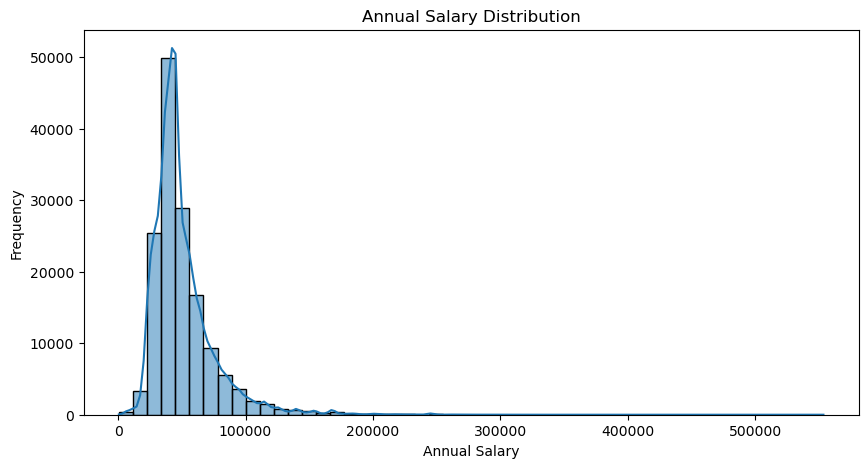

In [44]:
# Distribution of salaries
plt.figure(figsize=(10, 5))
sns.histplot(df['ANNUAL'], bins=50, kde=True)
plt.title("Annual Salary Distribution")
plt.xlabel("Annual Salary")
plt.ylabel("Frequency")
plt.show()

In [46]:
# Gender salary comparison
if 'GENDER_MALE' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='GENDER_MALE', y='ANNUAL', data=df)
    plt.title("Annual Salary by Gender")
    plt.show()

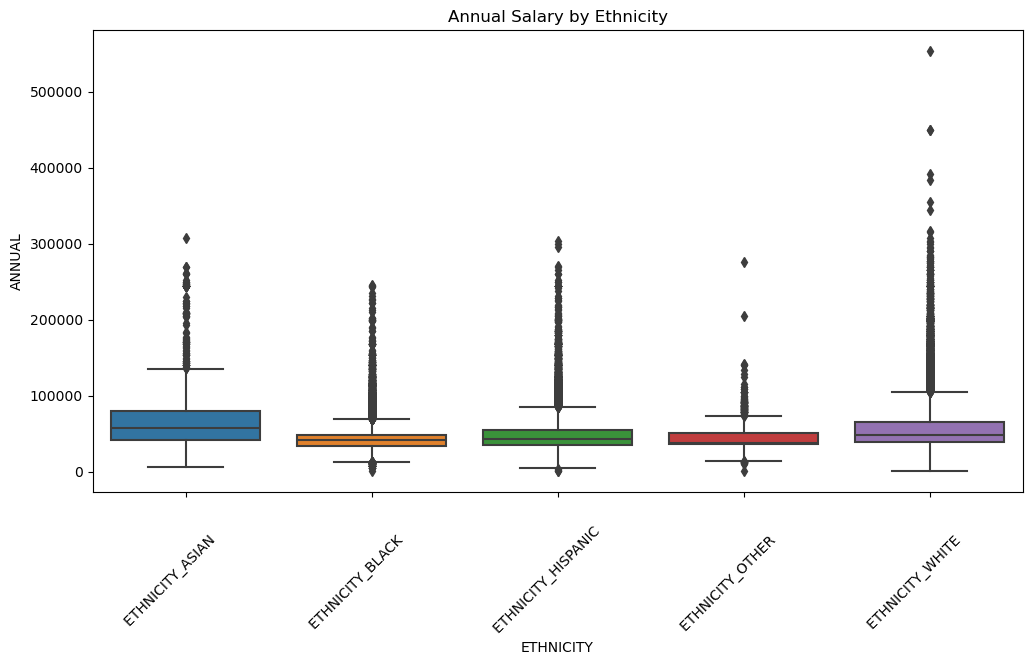

In [48]:
# Salary distribution by ethnicity
ethnicity_columns = [col for col in df.columns if 'ETHNICITY' in col]
if ethnicity_columns:
    plt.figure(figsize=(12, 6))
    df_melted = df.melt(id_vars=['ANNUAL'], value_vars=ethnicity_columns, var_name='ETHNICITY', value_name='Value')
    sns.boxplot(x='ETHNICITY', y='ANNUAL', data=df_melted[df_melted['Value'] == 1])
    plt.xticks(rotation=45)
    plt.title("Annual Salary by Ethnicity")
    plt.show()

In [50]:
# Top 10 job titles with highest average salary
if 'CLASS TITLE' in df.columns:
    top_jobs = df.groupby('CLASS TITLE')['ANNUAL'].mean().sort_values(ascending=False).head(10)
    print("Top 10 Job Titles by Average Salary:\n", top_jobs)


Top 10 Job Titles by Average Salary:
 CLASS TITLE
214     553500.000000
400     450000.000000
1053    384375.000000
1211    319000.000000
495     316116.960000
827     310999.980000
210     300572.000000
200     295800.000000
486     275500.920000
380     275000.005714
Name: ANNUAL, dtype: float64


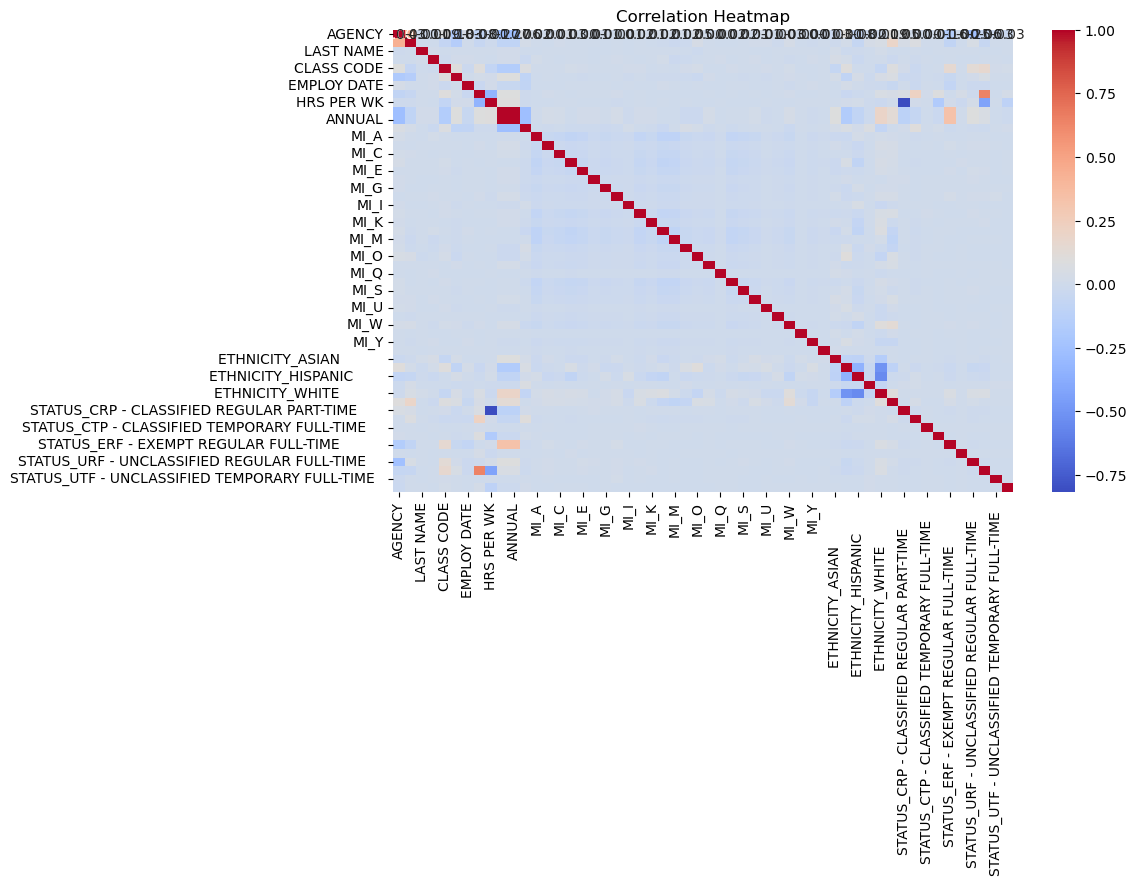

In [54]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [56]:
# Insights & Conclusions
print("\nKey Insights:")
print("1. The salary distribution is right-skewed, with some high earners.")
print("2. There may be gender and ethnicity-based pay disparities.")
print("3. Certain job titles have significantly higher salaries.")



Key Insights:
1. The salary distribution is right-skewed, with some high earners.
2. There may be gender and ethnicity-based pay disparities.
3. Certain job titles have significantly higher salaries.
